## Notebook Régression 

In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import operator
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor 

## Importation des BDD

In [2]:
#chemin jérémie
enedis_final = pd.read_csv("/Users/jeremiedarracq/Stat-app/enedis_final.csv",sep=",")

#chemin elena
#enedis = pd.read_csv("C:/Users/elelo/Documents/ENSAE/données statapp/Données/conso-inf36-region.csv",sep=";")

#chemin côme
#enedis = pd.read_csv("/Users/",sep=";")

meteo_reg_df=pd.read_csv("/Users/jeremiedarracq/Stat-app/temperature_reg.csv",";")

## I - Régression linéaire simple 
Objectif : Prédiction du Total d'énergie soutirée par journée en fonction de la température de la journée sur une région particulière

Méthode : 
- On somme le total d'énergie soutirée par 1/2h sur une journée en agrégant tout les points de soutirages 
- On l'associe avec la température sur la journée 
- Réalisation d'une régression simple 

## Région Île-de-France ( à reproduire pour les autres régions )

### Pré-processing

In [3]:
## On somme le total d'énergie sur la journée pour l'Occitanie
enedis_IDF = enedis_final.loc[enedis_final.region_x == "Île-de-France"]
enedis_IDF_new = enedis_IDF.groupby("horodate")["total_energie_soutiree_wh"].sum().reset_index()
enedis_IDF_new["date"]= enedis_IDF_new["horodate"].apply(lambda x : x[0:10])
meteo_reg_df_IDF= meteo_reg_df[meteo_reg_df.region=="Île-de-France"]

## On change l'unité de mesure en Méga Watt et on fusionne avec les données de températures
enedis_prev_IDF = enedis_IDF_new.groupby("date")["total_energie_soutiree_wh"].sum().reset_index()
enedis_prev_IDF["total_energie_soutiree_MGh"]=enedis_prev_IDF["total_energie_soutiree_wh"]*(10**(-6))
enedis_prev_IDF_cleen = enedis_prev_IDF.merge(meteo_reg_df_IDF,on = "date")

## Régression linéaire simple 

In [34]:
X = enedis_prev_IDF_cleen[["tmoy"]]
Y = enedis_prev_IDF_cleen[["total_energie_soutiree_wh"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Partie Apprentissage 

In [35]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(Y_train,X_train_sm).fit()
print_model = model.summary()
print(print_model)

                                OLS Regression Results                               
Dep. Variable:     total_energie_soutiree_wh   R-squared:                       0.777
Model:                                   OLS   Adj. R-squared:                  0.776
Method:                        Least Squares   F-statistic:                     1208.
Date:                       Thu, 09 Feb 2023   Prob (F-statistic):          4.83e-115
Time:                               22:15:26   Log-Likelihood:                -8553.8
No. Observations:                        349   AIC:                         1.711e+04
Df Residuals:                            347   BIC:                         1.712e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [38]:
def linear_plot(feature, label):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = np.squeeze(feature)
  y_coordinates = np.squeeze(label)
 # Contruct first degree polynomial function
  linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))

  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  #plt.plot(values, linear_func(values), color='red', label='Fonction linéaire')
  plt.plot(values, linear_func(values), color='red', label='Fonction linéaire')
  plt.xlabel('température moyenne ')
  plt.ylabel('Total énergie soutirée (wh) ')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.legend()
  plt.title("Fonction linéaire sur base d'apprentissage")
  plt.show()  

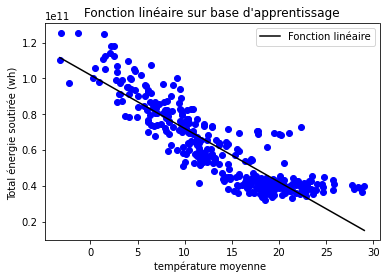

In [37]:
linear_plot(X_train, Y_train)

### Partie Prévisions / Test 

In [39]:
lm = LinearRegression() 
lm.fit(X_train, Y_train) 

LinearRegression()

In [40]:
## On calcule le R2 de notre prédiction
predictions = lm.predict(X_test)
print('r2_score= ', metrics.r2_score(Y_test, predictions))
print()

r2_score=  0.7459351623717788



In [41]:
predicted_total_energie_soutiree = pd.DataFrame(predictions, columns=['Prédiction_total_energie_soutiree']) # Create new dataframe of column'Predicted Weight'
actual_total_energie_soutiree = pd.DataFrame(Y_test)
actual_total_energie_soutiree = actual_total_energie_soutiree.reset_index(drop=True) 
df_actual_vs_predicted = pd.concat([actual_total_energie_soutiree,predicted_total_energie_soutiree],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
total_energie_soutiree_wh,8.275871e+10,1.351330e+09,3.803543e+10,4.239719e+10,4.226642e+10,7.735306e+10,4.320485e+10,3.480530e+10,6.376153e+10,6.893847e+10,...,6.006593e+10,1.138164e+11,6.974812e+10,6.211044e+10,4.292577e+10,3.463346e+10,7.411751e+10,5.423412e+10,3.727267e+10,4.232011e+10
Prédiction_total_energie_soutiree,7.568055e+10,3.352437e+10,4.121361e+10,2.230466e+10,2.780980e+10,7.469322e+10,5.090744e+10,3.861063e+10,6.966679e+10,7.364604e+10,...,5.276243e+10,9.743183e+10,3.358421e+10,7.391532e+10,5.853684e+10,4.638963e+10,6.470020e+10,6.302472e+10,5.000986e+10,4.312844e+10


Text(0.5, 1.0, 'Total energie soutiree du Test sample Vs Total energie soutiree prédit par le modèle')

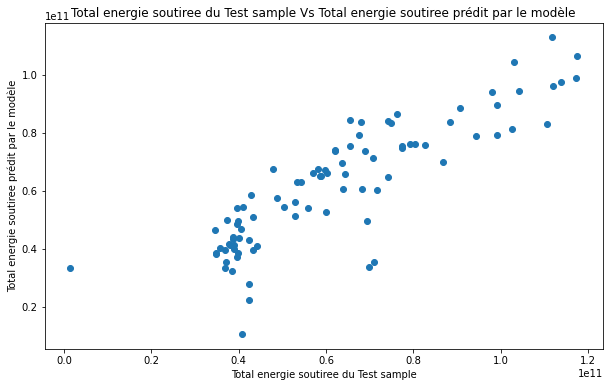

In [42]:
plt.scatter(Y_test, predictions)
plt.xlabel('Total energie soutiree du Test sample')
plt.ylabel('Total energie soutiree prédit par le modèle')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Total energie soutiree du Test sample Vs Total energie soutiree prédit par le modèle")

/Users/jeremiedarracq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

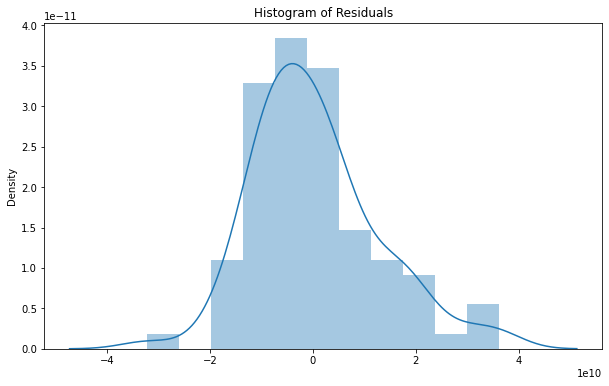

In [44]:
sns.distplot((Y_test-predictions))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")

## Regression Polynomial 

### Recherche de la fonction polynomial pertinente 

In [45]:
def polynomial_plot(feature, label):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = np.squeeze(feature)
  y_coordinates = np.squeeze(label)

 # Contruct first degree polynomial function
  #linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
  # Contruct polynomial function
  quadratic_func2 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
  quadratic_func3 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 3))
  quadratic_func4 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 4))
  quadratic_func5 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 5))
  quadratic_func6 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 6))
  

  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  #plt.plot(values, linear_func(values), color='red', label='Fonction linéaire')
  plt.plot(values, quadratic_func2(values), color='black', label='Fonction Quadratique (degrés 2)')
  plt.plot(values, quadratic_func3(values), color='orange', label='Fonction Quadratique (degrés 3)')
  plt.plot(values, quadratic_func4(values), color='red', label='Fonction Quadratique (degrés 4)')
  plt.plot(values, quadratic_func5(values), color='cyan', label='Fonction Quadratique (degrés 5)')
  plt.plot(values, quadratic_func6(values), color='green', label='Fonction Quadratique (degrés 6)')
  plt.xlabel('température moyenne ')
  plt.ylabel('Total énergie soutirée (wh) ')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.legend()
  plt.title("Fonction Quadratique sur base d'apprentissage")
  plt.show()  

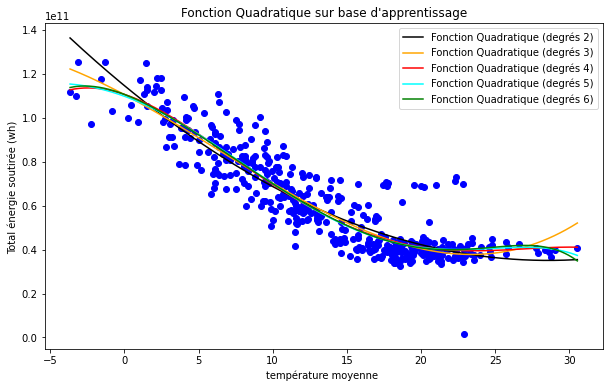

In [47]:
polynomial_plot(X, Y)

### Partie Apprentissage 

In [48]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, Y_train) 

PolynomialFeatures(degree=4)

In [49]:
X_poly_sm = sm.add_constant(X_poly)

model = sm.OLS(Y_train,X_poly_sm).fit()

print_model = model.summary()
print(print_model)

                                OLS Regression Results                               
Dep. Variable:     total_energie_soutiree_wh   R-squared:                       0.844
Model:                                   OLS   Adj. R-squared:                  0.842
Method:                        Least Squares   F-statistic:                     466.1
Date:                       Thu, 09 Feb 2023   Prob (F-statistic):          1.87e-137
Time:                               22:22:54   Log-Likelihood:                -8491.0
No. Observations:                        349   AIC:                         1.699e+04
Df Residuals:                            344   BIC:                         1.701e+04
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### Partie Test/prédictions 

In [50]:
lm = LinearRegression() 
lm.fit(X_poly, Y_train) 

LinearRegression()

In [51]:
## On calcule le R2 de notre prédiction
predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(Y_test, predictions))
print()

r2_score=  0.8016550793411978



In [52]:
predicted_total_energie_soutiree = pd.DataFrame(predictions, columns=['Prédiction_total_energie_soutiree']) # Create new dataframe of column'Predicted Weight'
actual_total_energie_soutiree = pd.DataFrame(Y_test)
actual_total_energie_soutiree = actual_total_energie_soutiree.reset_index(drop=True) 
df_actual_vs_predicted = pd.concat([actual_total_energie_soutiree,predicted_total_energie_soutiree],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
total_energie_soutiree_wh,8.275871e+10,1.351330e+09,3.803543e+10,4.239719e+10,4.226642e+10,7.735306e+10,4.320485e+10,3.480530e+10,6.376153e+10,6.893847e+10,...,6.006593e+10,1.138164e+11,6.974812e+10,6.211044e+10,4.292577e+10,3.463346e+10,7.411751e+10,5.423412e+10,3.727267e+10,4.232011e+10
Prédiction_total_energie_soutiree,7.507434e+10,3.957518e+10,4.084892e+10,4.013278e+10,3.965567e+10,7.355198e+10,4.564818e+10,4.019808e+10,6.609174e+10,7.195454e+10,...,4.702573e+10,1.066435e+11,3.957813e+10,7.236348e+10,5.227189e+10,4.292098e+10,5.938357e+10,5.730659e+10,4.503579e+10,4.149005e+10


Text(0.5, 1.0, 'Total energie soutiree du Test sample Vs Total energie soutiree prédit par le modèle')

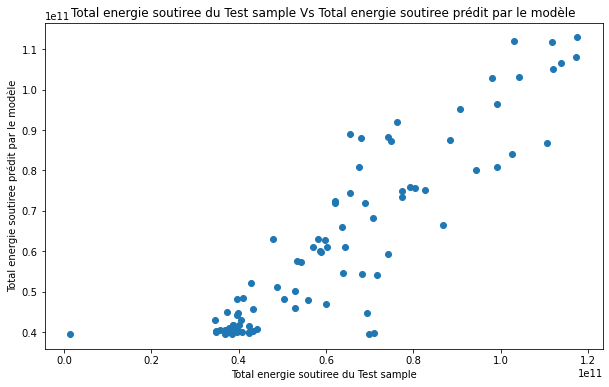

In [53]:
plt.scatter(Y_test, predictions)
plt.xlabel('Total energie soutiree du Test sample')
plt.ylabel('Total energie soutiree prédit par le modèle')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Total energie soutiree du Test sample Vs Total energie soutiree prédit par le modèle")

/Users/jeremiedarracq/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

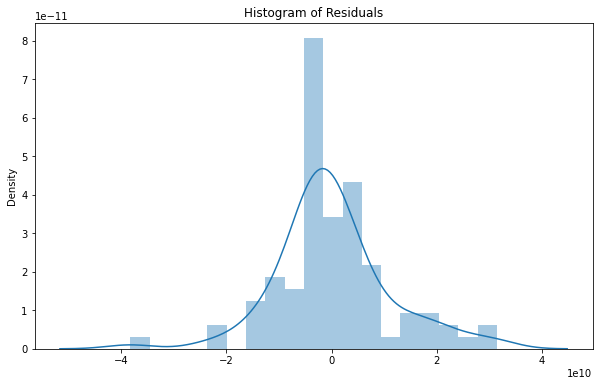

In [54]:
sns.distplot((Y_test-predictions))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")

## Regression linéaire par morceaux 

In [110]:
## Création des indicatrices
x = enedis_prev_IDF_cleen[["tmoy"]].to_numpy()
zero_tab1 = np.zeros(len(x)-len(x[x<15]))
x1 = x[x<15]
x1 = np.append(x1,zero_tab1)

zero_tab2 = np.zeros(len(x)-len(x[x>=15]))
x2 = x[x>=15]
x2 = np.append(zero_tab2,x2)

df_x1 = pd.DataFrame(x1, columns = ['Indicatrice < 15 moy'])
df_x2 = pd.DataFrame(x2, columns = ['Indicatrice >= 15 moy'])


In [112]:
#X = pd.DataFrame[['Indicatrice < 15 moy','Indicatrice >= 15 moy']]
X = pd.DataFrame([x1,x2]).T
Y = enedis_prev_IDF_cleen[["total_energie_soutiree_wh"]].to_numpy()

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Partie Apprentissage 

In [114]:
model = sm.OLS(Y_train,X_train).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              755.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   3.91e-127
Time:                        23:09:16   Log-Likelihood:                         -8890.5
No. Observations:                 349   AIC:                                  1.778e+04
Df Residuals:                     347   BIC:                                  1.779e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [129]:
## Re-traitement des données pour sklearn 
X = df_x1.join(df_x2)


,Indicatrice < 15 moy,Indicatrice >= 15 moy
0,14.51,0.00
1,14.20,0.00
2,14.56,0.00
3,14.22,0.00
4,14.55,0.00
...,...,...
432,0.00,21.02
433,0.00,22.85
434,0.00,22.28
435,0.00,22.34


In [127]:
lm = LinearRegression() 
lm.fit(X, Y) 

LinearRegression()

Pente :  [[1.08442664e+09 4.45806369e+08]]
Ordonnée à l'origine :  [5.18864264e+10]
Racine carrée de l'erreur quadratique moyenne :  5.149895234902861e+20
Sccore R2 :  0.02197344502308307


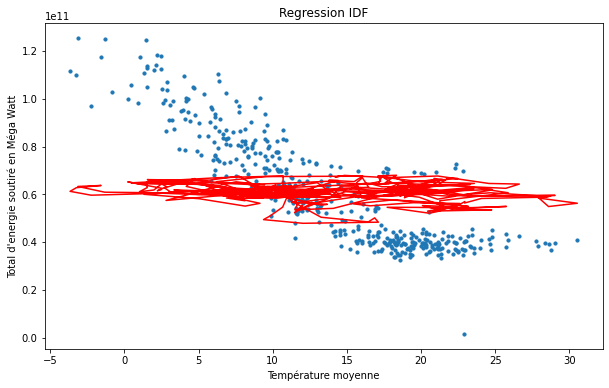

In [135]:
Y_predicted = lm.predict(X)
# Évaluation du modèle
rmse = mean_squared_error(Y, Y_predicted)
r2 = r2_score(Y, Y_predicted)
# Affichage des valeurs
print("Pente : " ,lm.coef_)
print("Ordonnée à l'origine : ", lm.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(enedis_prev_IDF_cleen["tmoy"], Y, s=10)
plt.xlabel('Température moyenne')
plt.ylabel("Total d'energie soutiré en Méga Watt")
plt.title("Regression IDF")
# Valeurs prédites
plt.plot(enedis_prev_IDF_cleen["tmoy"], Y_predicted, color='r')
plt.show()

,Indicatrice < 15 moy,Indicatrice >= 15 moy
0,14.51,0.00
1,14.20,0.00
2,14.56,0.00
3,14.22,0.00
4,14.55,0.00
...,...,...
432,0.00,21.02
433,0.00,22.85
434,0.00,22.28
435,0.00,22.34


## Régression linéaire ( par arbre de décisions )

In [137]:
X = enedis_prev_IDF_cleen[["tmoy"]].to_numpy()
Y = enedis_prev_IDF_cleen[["total_energie_soutiree_wh"]].to_numpy()

model = DecisionTreeRegressor(random_state=0, max_depth=2)
model.fit(X,Y)

Y_predicted = model.predict(X)


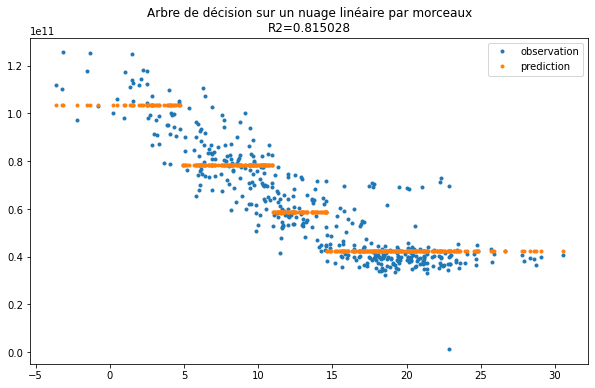

In [138]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, Y , ".", label="observation")
ax.plot(X, Y_predicted, ".", label="prediction")
ax.legend()
r2 = r2_score(Y, model.predict(X))
ax.set_title("Arbre de décision sur un nuage linéaire par morceaux\nR2=%f" % r2);

In [139]:
## On trie les seuils
th = list(sorted(set(model.tree_.threshold)))
th += [(th[i] + th[i-1])/2 for i in range(1,len(th))]
th = list(sorted(th))
th

[-2.0,
 1.412500023841858,
 4.825000047683716,
 7.892500042915344,
 10.960000038146973,
 12.785000085830688,
 14.610000133514404]

In [140]:
W = np.zeros((x.shape[0], len(th)+1))
X= x[:, 0]
W[:, 0] = X
for i in range(len(th)):
    W[X > th[i], i+1] = X[X > th[i]]

In [141]:
model = sm.OLS(Y,W)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              436.9
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   7.43e-201
Time:                        23:24:59   Log-Likelihood:                         -11018.
No. Observations:                 437   AIC:                                  2.205e+04
Df Residuals:                     429   BIC:                                  2.208e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.558e+10    3.5e+09    -10.172      0.000   -4.25e+10   -2.87e+10
x2          3.535e+10   8.08e+09      4.378      0.000    1.95e+10    5.12e+10
x3          2.852e+10   7.36e+09      3.873      0.000     1.4e+10     4.3e+10
x4         -1.547e+10   1.22e+09    -12.712      0.000   -1.79e+10   -1.31e+10
x5         -5.099e+09    5.6e+08     -9.098      0.000    -6.2e+09      -4e+09
x6         -2.642e+09   3.96e+08     -6.677      0.000   -3.42e+09   -1.86e+09
x7          -9.39e+08   3.99e+08     -2.352      0.019   -1.72e+09   -1.54e+08
x8         -2.072e+09   2.94e+08     -7.053      0.000   -2.65e+09   -1.49e+09
==============================================================================
Omnibus:                      275.976   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2617.067
Skew:                           2.640   Prob(JB):                         0.00
Kurtosis:                      13.764   Cond. No.                         423.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

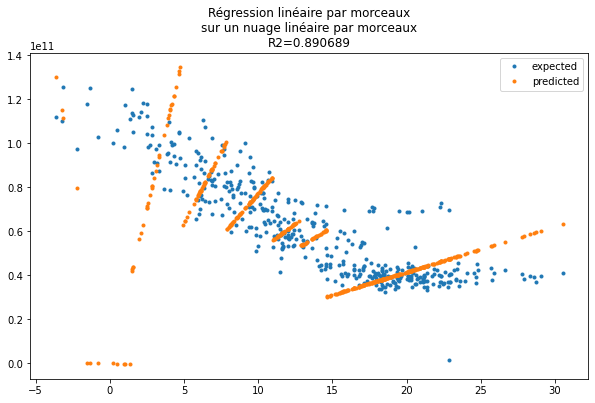

In [143]:
Y_predicted = results.predict(W)
fig, ax = plt.subplots(1, 1)
ax.plot(x[:, 0], Y, ".", label="expected")
ax.plot(x[:, 0], Y_predicted, ".", label="predicted")
ax.legend()
ax.set_title("Régression linéaire par morceaux\nsur un nuage linéaire par morceaux\nR2=%f" % results.rsquared);